In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# 读取四张表的数据
prior = pd.read_csv("../../../mac_obj_file/instacart/order_products__prior.csv")

In [3]:
products = pd.read_csv("../../../mac_obj_file/instacart/products.csv")

In [4]:
orders = pd.read_csv("../../../mac_obj_file/instacart/orders.csv")

In [5]:
aisles = pd.read_csv("../../../mac_obj_file/instacart/aisles.csv")

In [6]:
# 合并四张表到一张表中（用户-物品类别）
_mg = pd.merge(prior,products,on=['product_id','product_id'])
_mg = pd.merge(_mg,orders,on=['order_id','order_id'])
mt = pd.merge(_mg,aisles,on=['aisle_id','aisle_id'])


In [7]:
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [8]:
# 交叉表（特殊的分组表）,产生的数据为user_id作为样本，买的东西作为特征
cross = pd.crosstab(mt.user_id,mt['aisle'])

In [9]:
cross.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,19


In [10]:
# 进行主成分分析
pca = PCA(n_components=0.9)

In [11]:
data = pca.fit_transform(cross)

In [12]:
data

array([[-2.42156587e+01,  2.42942720e+00, -2.46636975e+00, ...,
         6.86800336e-01,  1.69439402e+00, -2.34323022e+00],
       [ 6.46320806e+00,  3.67511165e+01,  8.38255336e+00, ...,
         4.12121252e+00,  2.44689740e+00, -4.28348478e+00],
       [-7.99030162e+00,  2.40438257e+00, -1.10300641e+01, ...,
         1.77534453e+00, -4.44194030e-01,  7.86665571e-01],
       ...,
       [ 8.61143331e+00,  7.70129866e+00,  7.95240226e+00, ...,
        -2.74252456e+00,  1.07112531e+00, -6.31925661e-02],
       [ 8.40862199e+01,  2.04187340e+01,  8.05410372e+00, ...,
         7.27554259e-01,  3.51339470e+00, -1.79079914e+01],
       [-1.39534562e+01,  6.64621821e+00, -5.23030367e+00, ...,
         8.25329076e-01,  1.38230701e+00, -2.41942061e+00]])

In [19]:
# 把样本数量减少一些
df = data[:500]
df.shape

(500, 27)

In [22]:
# 假设将用户分为4个类别
kms = KMeans(n_clusters=4)

In [24]:
kms.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
predict = kms.predict(df)

In [31]:
# 查看样本分类情况（此时分类是无意义的（可以假设 0类喜欢吃，1类喜欢育婴，2类喜欢模型，3类喜欢家居 ），然后此结果即可作为df的目标值）
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
# 显示聚类的结果
plt.figure(figsize=(20,8),dpi=80)

<Figure size 1600x640 with 0 Axes>

<Figure size 1600x640 with 0 Axes>

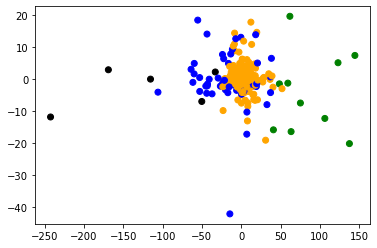

In [36]:
corlors = ['orange','green','blue','black']
colr = [corlors[i] for i in predict]
# 散点图(横坐标为一个特征，纵坐标也为一个特征,此时会汇出500个（x,y）对应着500个样本，而这500个样本均有自己各自的颜色)
# 坐标取的特征不一样，绘图结果不一样，下图对KMean算法计算规则和其评估标准，不具有任何参考意义。
plt.scatter(df[:,1],df[:,20],color=colr)

In [41]:
# 评判此次聚类效果（轮廓系数）
silhouette_score(df,predict)

0.6286360651613432